## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [24]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.axis as axis

import seaborn as sb

%matplotlib inline

movie_data = pd.read_csv('./data/tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [25]:
movie_data.head()
movie_data.tail()
movie_data.sample()
movie_data.dtypes
movie_data.isnull().any()
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [26]:
movie_data.pop('homepage')
movie_data.pop('tagline')
movie_data.pop('keywords')
movie_data.pop('production_companies')

movie_data['overview'].fillna('Unknown', inplace = True)
movie_data['genres'].fillna(method = 'ffill', axis = 0, inplace = True)
movie_data['cast'].fillna(method = 'ffill', axis = 0, inplace = True)

movie_data.dropna(axis = 0, inplace=True)
movie_data.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [27]:
movie_data[['id','popularity','budget','runtime','vote_average']]
movie_data.iloc[list(range(0,20))+ [47, 48]]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [28]:
movie_data[movie_data.popularity > 5]
movie_data[(movie_data.popularity > 5) & (movie_data.release_year > 1996)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [29]:
movie_data.groupby(['release_year']).revenue.agg('mean')
movie_data.groupby(['director']).popularity.agg('mean').sort_values(0, ascending=False)


director
Colin Trevorrow                     16.696886
Joe Russo|Anthony Russo             12.971027
Chad Stahelski|David Leitch         11.422751
Don Hall|Chris Williams              8.691294
Juno John Lee                        8.411577
Kyle Balda|Pierre Coffin             7.404165
Alan Taylor                          6.883129
Peter Richardson                     6.668990
Pete Docter                          6.326804
Christopher Nolan                    6.195521
Alex Garland                         6.118847
Patrick Tatopoulos                   5.806897
Wes Ball                             5.553082
Dan Gilroy                           5.522641
Lilly Wachowski|Lana Wachowski       5.331930
James Gunn                           5.225378
Bob Peterson|Pete Docter             4.908902
J.J. Abrams                          4.800957
Alejandro GonzÃ¡lez IÃ±Ã¡rritu       4.793536
Roger Allers|Rob Minkoff             4.782688
Damien Chazelle                      4.780419
Morten Tyldum            

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

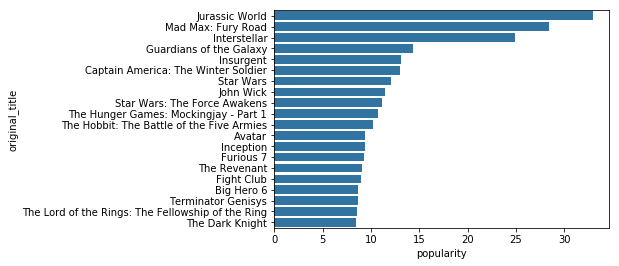

In [30]:
popular_movie = movie_data.sort_values(by='popularity', ascending=False).iloc[0:20]
base_color = sb.color_palette()[0]
sb.barplot(data = popular_movie, y = 'original_title', x = 'popularity', color = base_color);

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

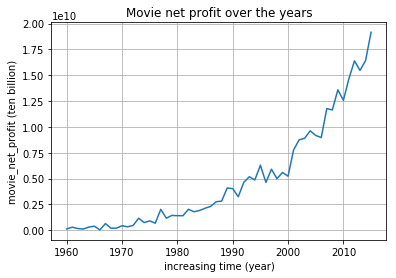

In [31]:
movie_data['release_year'].value_counts()



movie_data['net_profit'] = movie_data['revenue'] - movie_data['budget']
items = {'net_profit_sum' : movie_data.groupby(['release_year']).net_profit.agg('sum').sort_index(0)}
year_net_profit = pd.DataFrame(items)
plt.plot(year_net_profit['net_profit_sum'])
plt.title('Movie net profit over the years')
plt.xlabel('increasing time (year)')
plt.ylabel('movie_net_profit (ten billion)')
plt.grid(True)
plt.show()

1960到2016年间电影净收入总体呈上升趋势，尤其是2000年以后增速有了明显提升，净收入在不到20年的时间有了近3倍的提高。

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

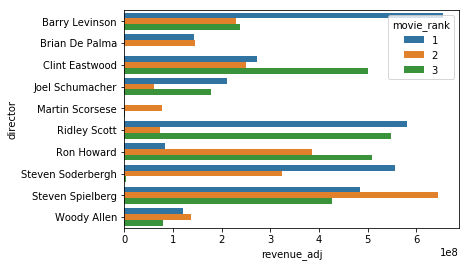

In [38]:
prolific_director = movie_data.groupby(['director']).original_title.agg('count').sort_values(0, ascending = False)[0:10].index
sorted_movies = movie_data[movie_data['director'].isin(prolific_director)].sort_values(['director','vote_average'],ascending=[True,False])

sorted_movies = sorted_movies.groupby(['director']).head(3).reset_index(drop=True)

sorted_movies['movie_rank'] = sorted_movies.index % 3 + 1
sb.barplot(data=sorted_movies, y="director", x="revenue_adj", hue='movie_rank');

通过最多产的10位导演，评分最高的三部电影可以发现，多产的导演的票房比较稳定，一般评分越高票房也越高

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

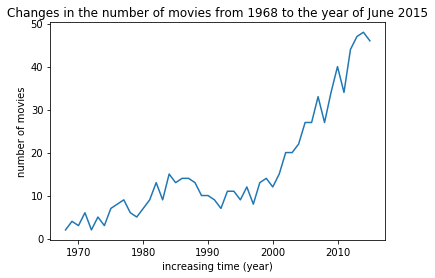

In [33]:
import datetime
def get_release_month(row):
    release_date = row['release_date']
    return datetime.datetime.strptime(release_date, '%m/%d/%y').month

movie_data['release_month'] = movie_data.apply(get_release_month , axis = 1)
result = movie_data[(movie_data['release_year'] >= 1968) & (movie_data['release_year'] <= 2015)
           &  (movie_data['release_month'] == 6) ]
items = {'movie_number' : result.groupby(['release_year']).original_title.agg('count')}
data = pd.DataFrame(items)

plt.plot(data['movie_number']);
plt.title('Changes in the number of movies from 1968 to the year of June 2015')
plt.xlabel('increasing time (year)')
plt.ylabel('number of movies')
plt.show()

1968年-2000年六月电影数量没有较大波动，从1968年出现到2000年也才发展到每年10部左右。2000年以后，到2015年的15年间，6月份电影数量有了大幅增大，达到过将近50部。

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

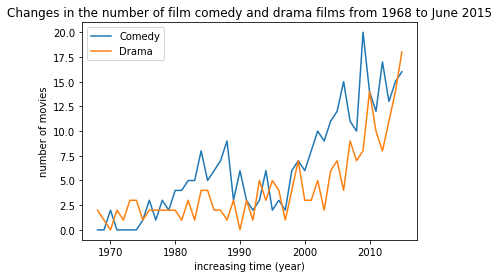

In [34]:
def mark_comedy_drama(row):
    orign_genres = row['genres']
    if 'Comedy' in orign_genres:
        return 'Comedy'
    elif 'Drama' in orign_genres:
        return 'Drama'

movie_data['genres_comedy_or_drama'] = movie_data.apply(mark_comedy_drama , axis = 1)

comedy_drama_movie = movie_data[(movie_data['release_year'] >= 1968) & (movie_data['release_year'] <= 2015)
           &  (movie_data['release_month'] == 6) 
           & ((movie_data['genres_comedy_or_drama'] == 'Comedy') | (movie_data['genres_comedy_or_drama'] == 'Drama'))]
result = comedy_drama_movie.groupby(['release_year','genres_comedy_or_drama']).original_title.agg('count')
release_year, genres_comedy_or_drama = zip(*result.index)
items = {'release_year' : release_year,'genres_comedy_or_drama' : genres_comedy_or_drama, 'movies_count' : result}
genres_movies_count = pd.DataFrame(items)
genres_movies_count = genres_movies_count.pivot(index='release_year', columns='genres_comedy_or_drama' , values=['movies_count'])
genres_movies_count = genres_movies_count.fillna(0)
genres_movies_count
#sb.barplot(data=data, y="movies_count", x="release_year", hue='genres_comedy_or_drama');
#sb.lineplot(data=genres_movies_count, x="release_year", y="movies_count",hue="genres_comedy_or_drama", style="event")
plt.plot(genres_movies_count['movies_count', 'Comedy'])
plt.plot(genres_movies_count['movies_count', 'Drama'])
plt.legend(['Comedy', 'Drama'])

plt.title('Changes in the number of film comedy and drama films from 1968 to June 2015')
plt.xlabel('increasing time (year)')
plt.ylabel('number of movies')
plt.show()

Comedy和Drama两种电影在1968年到2015年六月的发行趋势总体相同，但是常伴随此消彼长的竞争趋势。

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。